# Drug Traffiking experiment: improved model

This notebooks contains the Aequitas analysis for the enhanced iteration of the drug traffiking experiment. 

In [3]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import aequitas.plot as ap
from aequitas.bias import Bias
import matplotlib.pyplot as plt
from aequitas.group import Group
from aequitas.fairness import Fairness

### Cargando datos y pre-procesamiento

In [4]:
path = r'preds_dt_improved.csv'

df = pd.read_csv(path)
df.drop(columns=['Unnamed: 0'], inplace=True)
df.rename(columns={'0': 'label_value'}, inplace=True)
df['Edad'] = df['Edad'].astype(int)
df

,Region,Defensor,Audiencias efectivas,Desarrollo,Edad,Extranjero,score,label_value
0,Tarapacá,Jorge Rolando Bacian Roman,3.0,Consumado,21,Sí,1,1
1,Metropolitana,Helmuth Vargas Rosa,13.0,Consumado,18,No,0,1
2,Valparaíso,Cynthia Vivanco Rodriguez,10.0,Consumado,18,No,0,1
3,Los Lagos,Cristián Adolfo Rozas Dockendorff,7.0,Consumado,35,No,0,0
4,Tarapacá,Constanza Barrueto Bravo,6.0,Consumado,26,Sí,0,1
...,...,...,...,...,...,...,...,...
5002,Tarapacá,Cristina Veronica Rodriguez Alvarez,5.0,Consumado,19,No,0,1
5003,Tarapacá,Constanza Barrueto Bravo,8.0,Consumado,22,No,0,0
5004,Tarapacá,Carolina Francisca Lagos Jorquera,7.0,Consumado,22,Sí,1,1
5005,Coquimbo,Wladimir Andres Robles Santos,12.0,Consumado,18,No,0,0


In [5]:
## Cambio edad a intervalos

values = np.round(np.linspace(df['Edad'].min(),df['Edad'].max()+1,5))

interval = []

for i in df['Edad'].values:
  if math.isnan(i):
    interval.append('Not found')
  else:
    for j in range(len(values)):
      if values[j] != max(values):
        if i>= values[j] and i< values[j+1]:
          interval.append(str(values[j]) + ' - ' + str(values[j+1]))
      else:
        if i>= values[j]:
          interval.append('More than ' + str(values[j]))
df['Edad']=interval

In [6]:
## Creación de variable "Zona"

df['Zona'] = np.nan

norte = ['Tarapacá', 'Arica y Parinacota', 'Antofagasta', 'Atacama', "Coquimbo"]
centro = ['Metropolitana', 'Valparaíso', 'Maule', "Libertador Bernardo O'Higgins", 'Ñuble']
sur = ['Los Lagos', 'Bio Bío', 'Magallanes y Antártica Chilena', 'La Araucanía', 'Los Ríos', 'Aysén']

for i in range(len(df)):
    if df['Region'][i] in norte:
        df['Zona'][i] = 'Norte'
    elif df['Region'][i] in centro:
        df['Zona'][i] = 'Centro'
    elif df['Region'][i] in sur:
        df['Zona'][i] = 'Sur'

/var/folders/dv/yyl2yv_j3hl4xyrt3r2qmh4h0000gn/T/ipykernel_6575/3692948920.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Zona'][i] = 'Norte'


## Predictions

<AxesSubplot:xlabel='Edad', ylabel='count'>

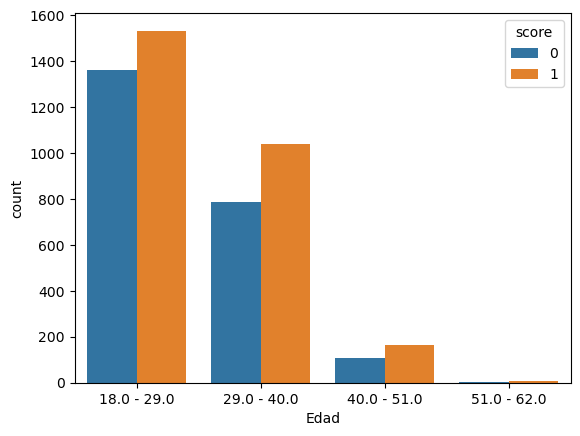

In [8]:
sns.countplot(x="Edad", hue="score", data=df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Tarapacá'),
  Text(1, 0, 'Metropolitana'),
  Text(2, 0, 'Valparaíso'),
  Text(3, 0, 'Los Lagos'),
  Text(4, 0, 'Arica y Parinacota'),
  Text(5, 0, 'Antofagasta'),
  Text(6, 0, 'Bio Bío'),
  Text(7, 0, 'Atacama'),
  Text(8, 0, 'Maule'),
  Text(9, 0, "Libertador Bernardo O'Higgins"),
  Text(10, 0, 'Coquimbo'),
  Text(11, 0, 'Magallanes y Antártica Chilena'),
  Text(12, 0, 'La Araucanía'),
  Text(13, 0, 'Los Ríos'),
  Text(14, 0, 'Ñuble'),
  Text(15, 0, 'Aysén')])

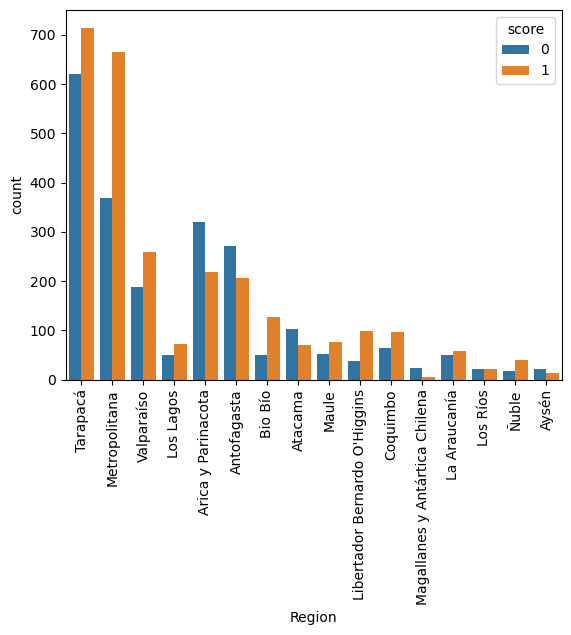

In [9]:
sns.countplot(x="Region", hue="score", data=df)
plt.xticks(rotation = 90)

<AxesSubplot:xlabel='Zona', ylabel='count'>

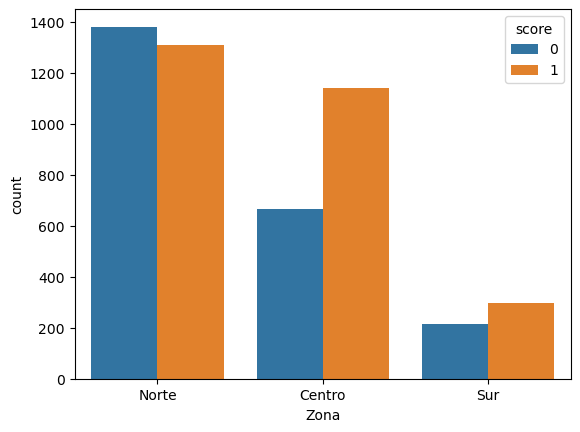

In [10]:
sns.countplot(x="Zona", hue="score", data=df)

### Actual values

<AxesSubplot:xlabel='Edad', ylabel='count'>

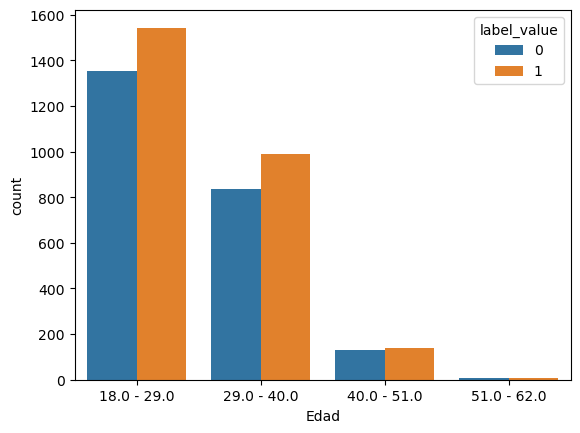

In [11]:
sns.countplot(x="Edad", hue="label_value", data=df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Tarapacá'),
  Text(1, 0, 'Metropolitana'),
  Text(2, 0, 'Valparaíso'),
  Text(3, 0, 'Los Lagos'),
  Text(4, 0, 'Arica y Parinacota'),
  Text(5, 0, 'Antofagasta'),
  Text(6, 0, 'Bio Bío'),
  Text(7, 0, 'Atacama'),
  Text(8, 0, 'Maule'),
  Text(9, 0, "Libertador Bernardo O'Higgins"),
  Text(10, 0, 'Coquimbo'),
  Text(11, 0, 'Magallanes y Antártica Chilena'),
  Text(12, 0, 'La Araucanía'),
  Text(13, 0, 'Los Ríos'),
  Text(14, 0, 'Ñuble'),
  Text(15, 0, 'Aysén')])

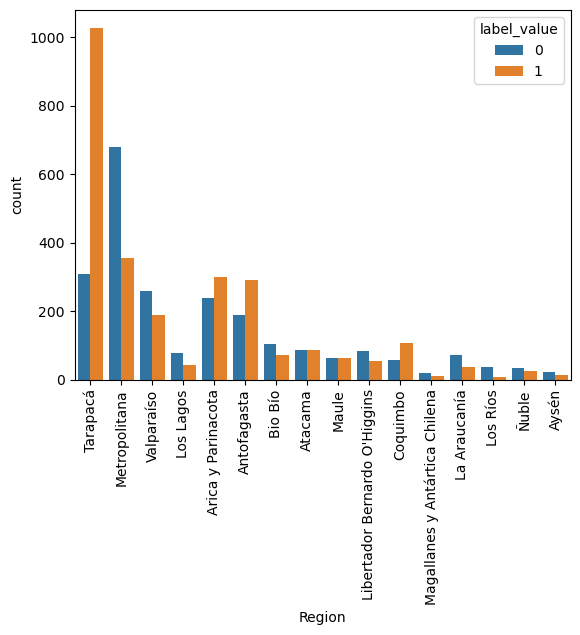

In [12]:
sns.countplot(x="Region", hue="label_value", data=df)
plt.xticks(rotation = 90)

<AxesSubplot:xlabel='Zona', ylabel='count'>

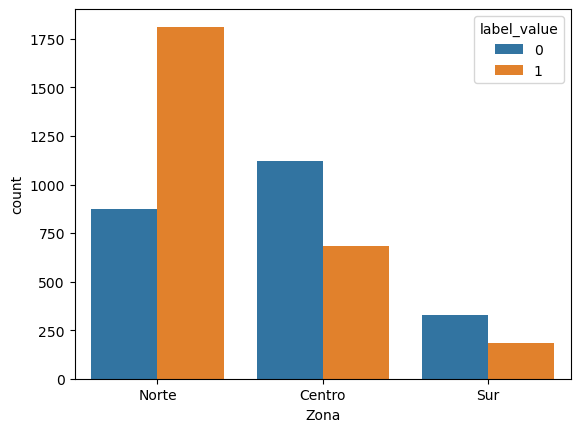

In [13]:
sns.countplot(x="Zona", hue="label_value", data=df)

## Aequitas analysis

### Bias metrics

In [14]:
df.drop(['Defensor', 'Audiencias efectivas'], axis=1, inplace = True)
df

,Region,Desarrollo,Edad,Extranjero,score,label_value,Zona
0,Tarapacá,Consumado,18.0 - 29.0,Sí,1,1,Norte
1,Metropolitana,Consumado,18.0 - 29.0,No,0,1,Centro
2,Valparaíso,Consumado,18.0 - 29.0,No,0,1,Centro
3,Los Lagos,Consumado,29.0 - 40.0,No,0,0,Sur
4,Tarapacá,Consumado,18.0 - 29.0,Sí,0,1,Norte
...,...,...,...,...,...,...,...
5002,Tarapacá,Consumado,18.0 - 29.0,No,0,1,Norte
5003,Tarapacá,Consumado,18.0 - 29.0,No,0,0,Norte
5004,Tarapacá,Consumado,18.0 - 29.0,Sí,1,1,Norte
5005,Coquimbo,Consumado,18.0 - 29.0,No,0,0,Norte


In [15]:
g = Group()
xtab, _ = g.get_crosstabs(df)

In [16]:
absolute_metrics = g.list_absolute_metrics(xtab)

In [17]:
xtab[[col for col in xtab.columns if col not in absolute_metrics]]

,model_id,score_threshold,k,attribute_name,attribute_value,pp,pn,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities
0,0,binary 0/1,2746,Region,Antofagasta,207,272,0,84,188,207,291,188,479,5007
1,0,binary 0/1,2746,Region,Arica y Parinacota,219,320,0,82,238,219,301,238,539,5007
2,0,binary 0/1,2746,Region,Atacama,70,103,8,25,78,62,87,86,173,5007
3,0,binary 0/1,2746,Region,Aysén,14,22,9,9,13,5,14,22,36,5007
4,0,binary 0/1,2746,Region,Bio Bío,127,49,76,21,28,51,72,104,176,5007
5,0,binary 0/1,2746,Region,Coquimbo,97,65,31,40,25,66,106,56,162,5007
6,0,binary 0/1,2746,Region,La Araucanía,58,49,43,21,28,15,36,71,107,5007
7,0,binary 0/1,2746,Region,Libertador Bernardo O'Higgins,99,38,57,11,27,42,53,84,137,5007
8,0,binary 0/1,2746,Region,Los Lagos,72,50,47,19,31,25,44,78,122,5007
9,0,binary 0/1,2746,Region,Los Ríos,22,22,18,4,18,4,8,36,44,5007


In [18]:
# Filter by relevant columns
relevant_cols = ['attribute_name', 'attribute_value', 'pp', 'pn', 'fp', 'fn', 'tn', 'tp']
filtered_xtab = xtab[relevant_cols]

# Group by 'attribute_name' and sum false negatives
fn_by_feature = filtered_xtab.groupby('attribute_name')['fn'].sum().reset_index()
filtered_xtab[filtered_xtab['attribute_name']=='Region']

# Calculando métricas
filtered_xtab['tpr'] = filtered_xtab['tp'] / (filtered_xtab['tp'] + filtered_xtab['fn'])
filtered_xtab['fnr'] = filtered_xtab['fn'] / (filtered_xtab['fn'] + filtered_xtab['tp'])
filtered_xtab['for'] = filtered_xtab['fn'] / (filtered_xtab['fn'] + filtered_xtab['tn'])
filtered_xtab['fdr'] = filtered_xtab['fp'] / (filtered_xtab['fp'] + filtered_xtab['tp'])

pd.set_option('mode.chained_assignment', None)

# Filtering for 'Region'
region_metrics = filtered_xtab[filtered_xtab['attribute_name'] == 'Region']


region_metrics.to_csv("dt_metrics_region_improved.csv", index=False)

/var/folders/dv/yyl2yv_j3hl4xyrt3r2qmh4h0000gn/T/ipykernel_6575/120077802.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_xtab['tpr'] = filtered_xtab['tp'] / (filtered_xtab['tp'] + filtered_xtab['fn'])
/var/folders/dv/yyl2yv_j3hl4xyrt3r2qmh4h0000gn/T/ipykernel_6575/120077802.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_xtab['fnr'] = filtered_xtab['fn'] / (filtered_xtab['fn'] + filtered_xtab['tp'])
/var/folders/dv/yyl2yv_j3hl4xyrt3r2qmh4h0000gn/T/ipykernel_6575/120077802.py:12:

In [19]:
print(region_metrics['tpr'].mean())
print(region_metrics['fnr'].mean())
print(region_metrics['for'].mean())
print(region_metrics['fdr'].mean())

0.6023245838286343
0.3976754161713657
0.3775707415072508
0.45287168422600077


In [20]:
region_metrics

,attribute_name,attribute_value,pp,pn,fp,fn,tn,tp,tpr,fnr,for,fdr
0,Region,Antofagasta,207,272,0,84,188,207,0.711340,0.288660,0.308824,0.000000
1,Region,Arica y Parinacota,219,320,0,82,238,219,0.727575,0.272425,0.256250,0.000000
2,Region,Atacama,70,103,8,25,78,62,0.712644,0.287356,0.242718,0.114286
3,Region,Aysén,14,22,9,9,13,5,0.357143,0.642857,0.409091,0.642857
4,Region,Bio Bío,127,49,76,21,28,51,0.708333,0.291667,0.428571,0.598425
5,Region,Coquimbo,97,65,31,40,25,66,0.622642,0.377358,0.615385,0.319588
6,Region,La Araucanía,58,49,43,21,28,15,0.416667,0.583333,0.428571,0.741379
7,Region,Libertador Bernardo O'Higgins,99,38,57,11,27,42,0.792453,0.207547,0.289474,0.575758
8,Region,Los Lagos,72,50,47,19,31,25,0.568182,0.431818,0.380000,0.652778
9,Region,Los Ríos,22,22,18,4,18,4,0.500000,0.500000,0.181818,0.818182


In [21]:
# Filtramos las filas relevantes
region_rows = xtab[xtab['attribute_name'] == 'Region']

# Calculamos las métricas
total_fp = region_rows['fp'].sum()
total_fn = region_rows['fn'].sum()
total_tp = region_rows['tp'].sum()
total_tn = region_rows['tn'].sum()

fpr = total_fp / (total_fp + total_tn)
fnr = total_fn / (total_fn + total_tp)
for_rate = total_fn / (total_fn + total_tn)
fdr = total_fp / (total_fp + total_tp)

print(f"False Positive Rate (FPR) for Region: {fpr:.4f}")
print(f"False Negative Rate (FNR) for Region: {fnr:.4f}")
print(f"False Omission Rate (FOR) for Region: {for_rate:.4f}")
print(f"False Discovery Rate (FDR) for Region: {fdr:.4f}")

False Positive Rate (FPR) for Region: 0.3925
False Negative Rate (FNR) for Region: 0.3163
False Omission Rate (FOR) for Region: 0.3751
False Discovery Rate (FDR) for Region: 0.3325


### Glosario del crosstab:

- k = Cantidad de predicciones positivas (suma de 1s).
- pp = Cantidad de ítems del grupo que fueron predecidos como Positivo.
- pn = Cantidad de ítems del grupo que fueron predecidos como Negativo.
- fp = Cantidad de ítems del grupo que son falsos positivos.
- fn = Cantidad de ítems del grupo que son falsos negativos.
- tn = Cantidad de ítems del grupo que son realmente negativos.
- tp = Cantidad de ítems del grupo que son realmente positivos.

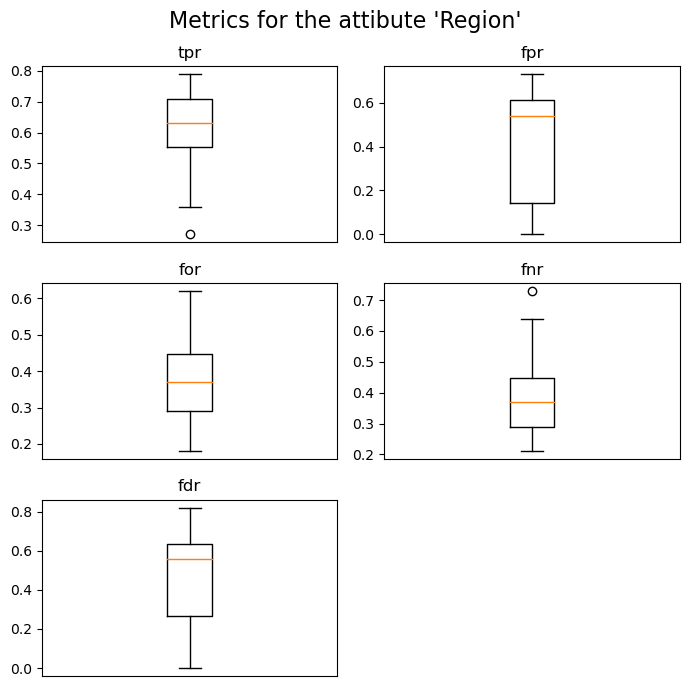

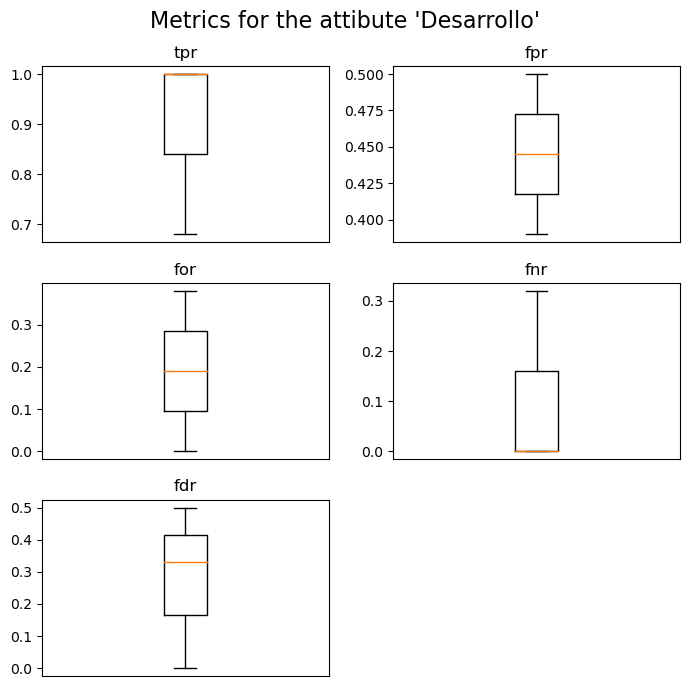

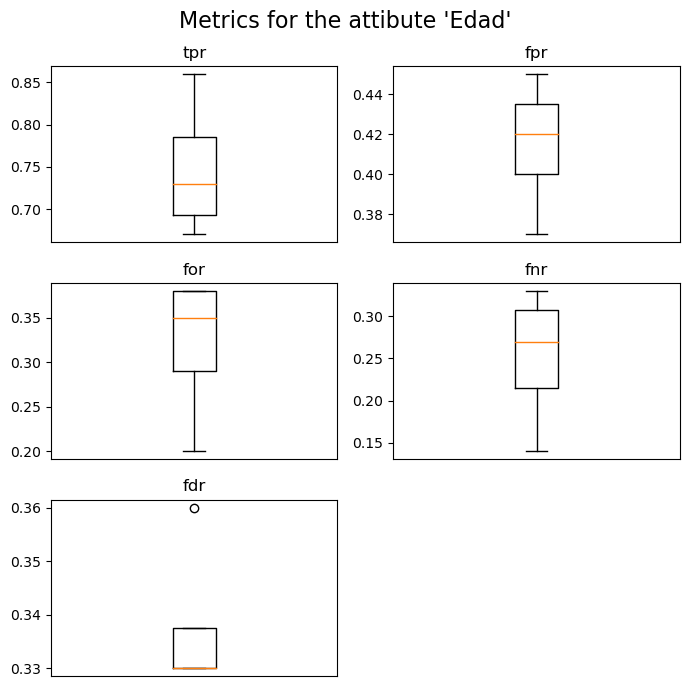

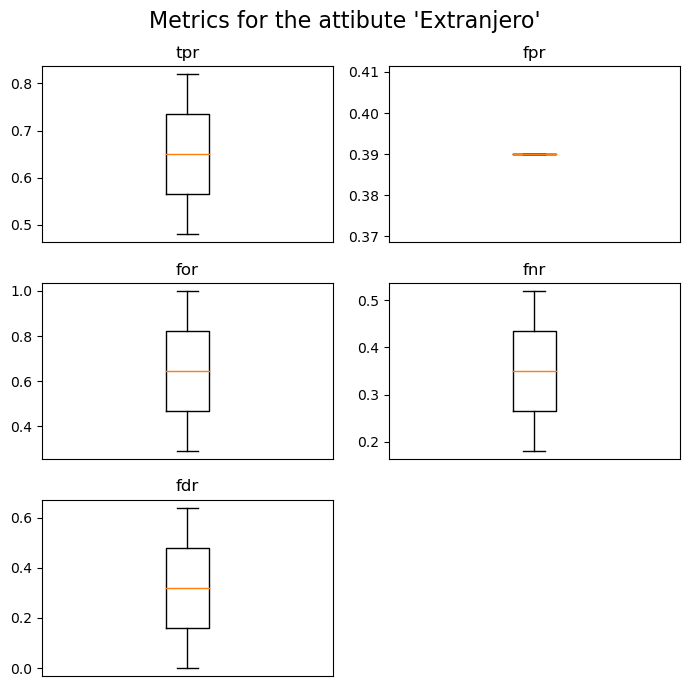

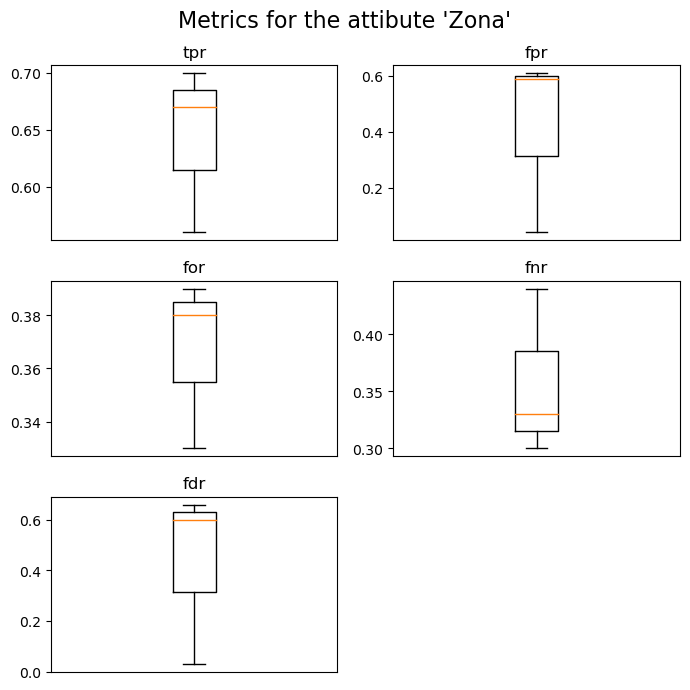

In [39]:
tab = xtab[['attribute_name', 'attribute_value'] + absolute_metrics].round(2)
metrics = ['tpr', 'fpr', 'for', 'fnr', 'fdr']
attributes = tab['attribute_name'].unique()

# Generar los gráficos
for attribute in attributes:
    fig, axs = plt.subplots(3, 2, figsize=(7, 7))
    
    # Aplanar el array de axis para facilitar su uso
    axs = axs.ravel()
    
    # Filtramos el dataframe por atributo
    attr_data = tab[tab['attribute_name'] == attribute]
    
    for i, metric in enumerate(metrics):
        # Dibujamos el boxplot para la métrica actual
        axs[i].boxplot(attr_data[metric].dropna())
        axs[i].set_title(metric)
        axs[i].set_xticks([])  # Eliminar ticks del eje x
        
    # Eliminar el último subplot que no se usa
    fig.delaxes(axs[-1])
    
    # Título del conjunto de boxplots
    plt.suptitle(f"Metrics for the attibute '{attribute}'", fontsize=16)
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)  # Ajustar espacio para el título principal
    plt.show()

In [ ]:
xtab[['attribute_name', 'attribute_value'] + absolute_metrics].round(2)

,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,fnr,npv,precision,ppr,pprev,prev
0,Region,Antofagasta,0.71,1.00,0.31,0.00,0.00,0.29,0.69,1.00,0.08,0.43,0.61
1,Region,Arica y Parinacota,0.73,1.00,0.26,0.00,0.00,0.27,0.74,1.00,0.08,0.41,0.56
2,Region,Atacama,0.71,0.91,0.24,0.11,0.09,0.29,0.76,0.89,0.03,0.40,0.50
3,Region,Aysén,0.36,0.59,0.41,0.64,0.41,0.64,0.59,0.36,0.01,0.39,0.39
4,Region,Bio Bío,0.71,0.27,0.43,0.60,0.73,0.29,0.57,0.40,0.05,0.72,0.41
5,Region,Coquimbo,0.62,0.45,0.62,0.32,0.55,0.38,0.38,0.68,0.04,0.60,0.65
6,Region,La Araucanía,0.42,0.39,0.43,0.74,0.61,0.58,0.57,0.26,0.02,0.54,0.34
7,Region,Libertador Bernardo O'Higgins,0.79,0.32,0.29,0.58,0.68,0.21,0.71,0.42,0.04,0.72,0.39
8,Region,Los Lagos,0.57,0.40,0.38,0.65,0.60,0.43,0.62,0.35,0.03,0.59,0.36
9,Region,Los Ríos,0.50,0.50,0.18,0.82,0.50,0.50,0.82,0.18,0.01,0.50,0.18


In [ ]:
print('FPR: ',  xtab["fpr"].mean())
print('FNR: ',  xtab["fnr"].mean())
print('FDR: ',  xtab["fdr"].mean())
print('FOR: ',  xtab["for"].mean())

FPR:  0.42331714703991874
FNR:  0.3379862059197989
FDR:  0.4052417237343562
FOR:  0.3735309641615148


### Glosario de métricas absolutas:

- tpr = Proporción de verdaderos positivos.
- tnr = Proporción de verdaderos negativos.
- for = Proporción de falsos negativos sobre el total de negativos predecidos.
- fdr = Proporción de falsos positivos sobre el total de positivos predecidos.
- fpr = Proporción de falsos positivos sobre el total de negativos reales.
- fnr = Proporción de falsos negativos sobre el total de positivos reales.
- npv = Negative Predictive Value (?)
- ppr = Fracción de esta entidad que fue predecida positiva sobre el total de registros.
- pprev = Fracción de esta entidad del grupo que fue predecida como positva.
- prev = Fracción de esta entidad del grupo que es realemente positiva.

### Disparity levels

In [ ]:
b = Bias()
df.head()

,Region,Desarrollo,Edad,Extranjero,score,label_value,Zona
0,Tarapacá,Consumado,18.0 - 29.0,Sí,1.0,1,Norte
1,Metropolitana,Consumado,18.0 - 29.0,No,0.0,1,Centro
2,Valparaíso,Consumado,18.0 - 29.0,No,0.0,1,Centro
3,Los Lagos,Consumado,29.0 - 40.0,No,0.0,0,Sur
4,Tarapacá,Consumado,18.0 - 29.0,Sí,0.0,1,Norte


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5007 entries, 0 to 5006
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Region       5007 non-null   object 
 1   Desarrollo   5007 non-null   object 
 2   Edad         5007 non-null   object 
 3   Extranjero   5007 non-null   object 
 4   score        5007 non-null   float64
 5   label_value  5007 non-null   int64  
 6   Zona         5007 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 273.9+ KB


### Mayor group.

In [ ]:
grupo_mayoritario = b.get_disparity_major_group(xtab, original_df=df)
disp = grupo_mayoritario[['attribute_name', 'attribute_value'] +  b.list_disparities(grupo_mayoritario)]
disp

get_disparity_major_group()


,attribute_name,attribute_value,ppr_disparity,pprev_disparity,precision_disparity,fdr_disparity,for_disparity,fpr_disparity,fnr_disparity,tpr_disparity,tnr_disparity,npv_disparity
0,Region,Antofagasta,0.289510,0.807486,1.000000,NaN,0.612714,NaN,0.948058,1.022738,1.000000,1.393573
1,Region,Arica y Parinacota,0.306294,0.759199,1.000000,NaN,0.508407,NaN,0.894739,1.046080,1.000000,1.499574
2,Region,Atacama,0.097902,0.756053,0.885714,10.000000,0.481560,10.000000,0.943777,1.024612,0.906977,1.526857
3,Region,Aysén,0.019580,0.726651,0.357143,10.000000,0.811647,10.000000,2.111365,0.513487,0.590909,1.191411
4,Region,Bio Bío,0.177622,1.348315,0.401575,10.000000,0.850297,10.000000,0.957934,1.018415,0.269231,1.152134
5,Region,Coquimbo,0.135664,1.118812,0.680412,10.000000,1.220939,10.000000,1.239375,0.895210,0.446429,0.775475
6,Region,La Araucanía,0.081119,1.012849,0.258621,10.000000,0.850297,10.000000,1.915868,0.599068,0.394366,1.152134
7,Region,Libertador Bernardo O'Higgins,0.138462,1.350253,0.424242,10.000000,0.574323,10.000000,0.681657,1.139359,0.321429,1.432587
8,Region,Los Lagos,0.100699,1.102740,0.347222,10.000000,0.753930,10.000000,1.418240,0.816910,0.397436,1.250065
9,Region,Los Ríos,0.030769,0.934266,0.181818,10.000000,0.360732,10.000000,1.642173,0.718881,0.500000,1.649646


In [ ]:
print('FNR Disparity:', disp['fnr_disparity'].mean())
print('FOR Disparity:', disp['for_disparity'].mean())
print('TPR Disparity:', disp['tpr_disparity'].mean())

FNR Disparity: 1.0660523902859296
FOR Disparity: 0.8764451093459319
TPR Disparity: 0.9905259266418583


### Min values

In [ ]:
min_valores = b.get_disparity_min_metric(df=xtab, original_df=df)
disp = min_valores[['attribute_name', 'attribute_value'] +  b.list_disparities(min_valores)]
disp

get_disparity_min_metric()


,attribute_name,attribute_value,ppr_disparity,pprev_disparity,precision_disparity,fdr_disparity,for_disparity,fpr_disparity,fnr_disparity,tpr_disparity,tnr_disparity,npv_disparity
0,Region,Antofagasta,34.500000,2.160752,5.500000,NaN,1.698529,NaN,1.390815,2.608247,3.714286,1.797059
1,Region,Arica y Parinacota,36.500000,2.031540,5.500000,NaN,1.409375,NaN,1.312594,2.667774,3.714286,1.933750
2,Region,Atacama,11.666667,2.023121,4.871429,10.000000,1.334951,10.000000,1.384535,2.613027,3.368771,1.968932
3,Region,Aysén,2.333333,1.944444,1.964286,10.000000,2.250000,10.000000,3.097403,1.309524,2.194805,1.536364
4,Region,Bio Bío,21.166667,3.607955,2.208661,10.000000,2.357143,10.000000,1.405303,2.597222,1.000000,1.485714
5,Region,Coquimbo,16.166667,2.993827,3.742268,10.000000,3.384615,10.000000,1.818182,2.283019,1.658163,1.000000
6,Region,La Araucanía,9.666667,2.710280,1.422414,10.000000,2.357143,10.000000,2.810606,1.527778,1.464789,1.485714
7,Region,Libertador Bernardo O'Higgins,16.500000,3.613139,2.333333,10.000000,1.592105,10.000000,1.000000,2.905660,1.193878,1.847368
8,Region,Los Lagos,12.000000,2.950820,1.909722,10.000000,2.090000,10.000000,2.080579,2.083333,1.476190,1.612000
9,Region,Los Ríos,3.666667,2.500000,1.000000,10.000000,1.000000,10.000000,2.409091,1.833333,1.857143,2.127273


In [ ]:
print('FNR Disparity:', disp['fnr_disparity'].mean())
print('FOR Disparity:', disp['for_disparity'].mean())
print('TPR Disparity:', disp['tpr_disparity'].mean())

FNR Disparity: 2.1268764894606407
FOR Disparity: 2.207909054165623
TPR Disparity: 1.7830309060202023


### Predefined group: Región Metropolitana, aged between 18 and 34 years, chilean.

In [ ]:
grupo_definido = b.get_disparity_predefined_groups(xtab, original_df=df, 
                                        ref_groups_dict={'Region':'Metropolitana', 'Desarrollo':'Consumado','Edad':'18.0 - 29.0','Extranjero': 'No','Zona':'Centro'}, 
                                        alpha=0.05, check_significance=True, 
                                        mask_significance=True)

disp = grupo_definido[['attribute_name', 'attribute_value'] +  b.list_disparities(grupo_definido)]
disp

get_disparity_predefined_group()


/Users/nsalazarv/miniforge3/lib/python3.10/site-packages/aequitas/bias.py:606: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  _, difference_significance_p = stats.ttest_ind(
/Users/nsalazarv/miniforge3/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1250: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/Users/nsalazarv/miniforge3/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1250: RuntimeWarning: invalid value encountered in double_scalars
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/Users/nsalazarv/miniforge3/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1250: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/Users/nsalazarv/miniforge3/lib/python3.10/site-packages/scipy/sta

,attribute_name,attribute_value,fdr_disparity,fnr_disparity,for_disparity,fpr_disparity,npv_disparity,ppr_disparity,pprev_disparity,precision_disparity,tnr_disparity,tpr_disparity
0,Region,Antofagasta,0.000000,0.946163,1.052288,0.000000,0.978281,0.310811,0.670936,2.707317,2.615385,1.023636
1,Region,Arica y Parinacota,0.000000,0.892949,0.873148,0.000000,1.052692,0.328829,0.630814,2.707317,2.615385,1.046998
2,Region,Atacama,0.181224,0.941890,0.827041,0.150609,1.071845,0.105105,0.628200,2.397909,2.372093,1.025512
3,Region,Aysén,1.019388,2.107143,1.393939,0.662338,0.836364,0.021021,0.603770,0.966899,1.545455,0.513937
4,Region,Bio Bío,0.948931,0.956019,1.460317,1.183150,0.808791,0.190691,1.120308,1.087190,0.704142,1.019309
5,Region,Coquimbo,0.506775,1.236897,2.096866,0.896259,0.544379,0.145646,0.929615,1.842092,1.167582,0.895996
6,Region,La Araucanía,1.175616,1.912037,1.460317,0.980550,0.808791,0.087087,0.841571,0.700168,1.031419,0.599593
7,Region,Libertador Bernardo O'Higgins,0.912987,0.680294,0.986355,1.098639,1.005668,0.148649,1.121918,1.148559,0.840659,1.140359
8,Region,Los Lagos,1.035119,1.415404,1.294815,0.975580,0.877538,0.108108,0.916261,0.940041,1.039448,0.817627
9,Region,Los Ríos,1.297403,1.638889,0.619529,0.809524,1.158042,0.033033,0.776276,0.492239,1.307692,0.719512


In [ ]:
print('FNR Disparity:', disp['fnr_disparity'].mean())
print('FOR Disparity:', disp['for_disparity'].mean())
print('TPR Disparity:', disp['tpr_disparity'].mean())

FNR Disparity: 1.0547868944343104
FOR Disparity: 1.2134832988035857
TPR Disparity: 0.9946082780520789


Seguiremos la investigación con este grupo.

In [ ]:
grupo_definido[['attribute_name', 'attribute_value'] +  b.list_disparities(grupo_definido)]

,attribute_name,attribute_value,fdr_disparity,fnr_disparity,for_disparity,fpr_disparity,npv_disparity,ppr_disparity,pprev_disparity,precision_disparity,tnr_disparity,tpr_disparity
0,Region,Antofagasta,0.000000,0.946163,1.052288,0.000000,0.978281,0.310811,0.670936,2.707317,2.615385,1.023636
1,Region,Arica y Parinacota,0.000000,0.892949,0.873148,0.000000,1.052692,0.328829,0.630814,2.707317,2.615385,1.046998
2,Region,Atacama,0.181224,0.941890,0.827041,0.150609,1.071845,0.105105,0.628200,2.397909,2.372093,1.025512
3,Region,Aysén,1.019388,2.107143,1.393939,0.662338,0.836364,0.021021,0.603770,0.966899,1.545455,0.513937
4,Region,Bio Bío,0.948931,0.956019,1.460317,1.183150,0.808791,0.190691,1.120308,1.087190,0.704142,1.019309
5,Region,Coquimbo,0.506775,1.236897,2.096866,0.896259,0.544379,0.145646,0.929615,1.842092,1.167582,0.895996
6,Region,La Araucanía,1.175616,1.912037,1.460317,0.980550,0.808791,0.087087,0.841571,0.700168,1.031419,0.599593
7,Region,Libertador Bernardo O'Higgins,0.912987,0.680294,0.986355,1.098639,1.005668,0.148649,1.121918,1.148559,0.840659,1.140359
8,Region,Los Lagos,1.035119,1.415404,1.294815,0.975580,0.877538,0.108108,0.916261,0.940041,1.039448,0.817627
9,Region,Los Ríos,1.297403,1.638889,0.619529,0.809524,1.158042,0.033033,0.776276,0.492239,1.307692,0.719512


Aquí, la disparidad corresponde a la proporción de la métrica del atributo. Se hace con métrica del atributo/métrica atributo grupo control. 

In [ ]:
metrics = ['fnr','for','tpr']
disparity_tolerance = 1.5 ### Este es nuestro Tau

In [ ]:
grupo_definido = grupo_definido.replace(0,0.0002)

In [ ]:
ap.summary(grupo_definido, metrics, fairness_threshold = disparity_tolerance)

alt.VConcatChart(...)

In [ ]:
ap.disparity(grupo_definido, metrics, 'Region', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

In [ ]:
ap.absolute(grupo_definido, metrics, 'Region', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

In [ ]:
ap.disparity(grupo_definido, metrics, 'Zona', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

In [ ]:
ap.absolute(grupo_definido, metrics, 'Zona', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

In [ ]:
ap.disparity(grupo_definido, metrics, 'Edad', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

In [ ]:
ap.absolute(grupo_definido, metrics, 'Edad', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

In [ ]:
ap.disparity(grupo_definido, metrics, 'Desarrollo', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

In [ ]:
ap.absolute(grupo_definido, metrics, 'Desarrollo', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

In [ ]:
ap.disparity(grupo_definido, metrics, 'Extranjero', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

In [ ]:
ap.absolute(grupo_definido, metrics, 'Extranjero', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

## Now testing with the mayor group.

In [ ]:
grupo_mayoritario[['attribute_name', 'attribute_value'] +  b.list_disparities(grupo_mayoritario)]

,attribute_name,attribute_value,ppr_disparity,pprev_disparity,precision_disparity,fdr_disparity,for_disparity,fpr_disparity,fnr_disparity,tpr_disparity,tnr_disparity,npv_disparity
0,Region,Antofagasta,0.289510,0.807486,1.000000,NaN,0.612714,NaN,0.948058,1.022738,1.000000,1.393573
1,Region,Arica y Parinacota,0.306294,0.759199,1.000000,NaN,0.508407,NaN,0.894739,1.046080,1.000000,1.499574
2,Region,Atacama,0.097902,0.756053,0.885714,10.000000,0.481560,10.000000,0.943777,1.024612,0.906977,1.526857
3,Region,Aysén,0.019580,0.726651,0.357143,10.000000,0.811647,10.000000,2.111365,0.513487,0.590909,1.191411
4,Region,Bio Bío,0.177622,1.348315,0.401575,10.000000,0.850297,10.000000,0.957934,1.018415,0.269231,1.152134
5,Region,Coquimbo,0.135664,1.118812,0.680412,10.000000,1.220939,10.000000,1.239375,0.895210,0.446429,0.775475
6,Region,La Araucanía,0.081119,1.012849,0.258621,10.000000,0.850297,10.000000,1.915868,0.599068,0.394366,1.152134
7,Region,Libertador Bernardo O'Higgins,0.138462,1.350253,0.424242,10.000000,0.574323,10.000000,0.681657,1.139359,0.321429,1.432587
8,Region,Los Lagos,0.100699,1.102740,0.347222,10.000000,0.753930,10.000000,1.418240,0.816910,0.397436,1.250065
9,Region,Los Ríos,0.030769,0.934266,0.181818,10.000000,0.360732,10.000000,1.642173,0.718881,0.500000,1.649646


In [ ]:
grupo_mayoritario = grupo_mayoritario.replace(0,0.0002)

In [ ]:
ap.summary(grupo_mayoritario, metrics, fairness_threshold = disparity_tolerance)

alt.VConcatChart(...)

In [ ]:
ap.disparity(grupo_mayoritario, metrics, 'Region', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

In [ ]:
ap.absolute(grupo_mayoritario, metrics, 'Region', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

In [ ]:
ap.disparity(grupo_mayoritario, metrics, 'Zona', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

In [ ]:
ap.absolute(grupo_mayoritario, metrics, 'Zona', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

In [ ]:
ap.disparity(grupo_mayoritario, metrics, 'Edad', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

In [ ]:
ap.absolute(grupo_mayoritario, metrics, 'Edad', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

In [ ]:
ap.disparity(grupo_mayoritario, metrics, 'Desarrollo', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

In [ ]:
ap.absolute(grupo_mayoritario, metrics, 'Desarrollo', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

In [ ]:
ap.disparity(grupo_mayoritario, metrics, 'Extranjero', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

In [ ]:
ap.absolute(grupo_mayoritario, metrics, 'Extranjero', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

## Now testing with the min metrics group.

In [ ]:
min_valores[['attribute_name', 'attribute_value'] +  b.list_disparities(min_valores)]

,attribute_name,attribute_value,ppr_disparity,pprev_disparity,precision_disparity,fdr_disparity,for_disparity,fpr_disparity,fnr_disparity,tpr_disparity,tnr_disparity,npv_disparity
0,Region,Antofagasta,34.500000,2.160752,5.500000,NaN,1.698529,NaN,1.390815,2.608247,3.714286,1.797059
1,Region,Arica y Parinacota,36.500000,2.031540,5.500000,NaN,1.409375,NaN,1.312594,2.667774,3.714286,1.933750
2,Region,Atacama,11.666667,2.023121,4.871429,10.000000,1.334951,10.000000,1.384535,2.613027,3.368771,1.968932
3,Region,Aysén,2.333333,1.944444,1.964286,10.000000,2.250000,10.000000,3.097403,1.309524,2.194805,1.536364
4,Region,Bio Bío,21.166667,3.607955,2.208661,10.000000,2.357143,10.000000,1.405303,2.597222,1.000000,1.485714
5,Region,Coquimbo,16.166667,2.993827,3.742268,10.000000,3.384615,10.000000,1.818182,2.283019,1.658163,1.000000
6,Region,La Araucanía,9.666667,2.710280,1.422414,10.000000,2.357143,10.000000,2.810606,1.527778,1.464789,1.485714
7,Region,Libertador Bernardo O'Higgins,16.500000,3.613139,2.333333,10.000000,1.592105,10.000000,1.000000,2.905660,1.193878,1.847368
8,Region,Los Lagos,12.000000,2.950820,1.909722,10.000000,2.090000,10.000000,2.080579,2.083333,1.476190,1.612000
9,Region,Los Ríos,3.666667,2.500000,1.000000,10.000000,1.000000,10.000000,2.409091,1.833333,1.857143,2.127273


In [ ]:
min_valores = min_valores.replace(0,0.0002)

In [ ]:
ap.summary(min_valores, metrics, fairness_threshold = disparity_tolerance)

alt.VConcatChart(...)

In [ ]:
ap.disparity(min_valores, metrics, 'Region', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

In [ ]:
ap.absolute(min_valores, metrics, 'Region', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

In [ ]:
ap.disparity(min_valores, metrics, 'Zona', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

In [ ]:
ap.absolute(min_valores, metrics, 'Zona', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

In [ ]:
ap.disparity(min_valores, metrics, 'Edad', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

In [ ]:
ap.absolute(min_valores, metrics, 'Edad', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

In [ ]:
ap.disparity(min_valores, metrics, 'Desarrollo', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

In [ ]:
ap.absolute(min_valores, metrics, 'Desarrollo', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

In [ ]:
ap.disparity(min_valores, metrics, 'Extranjero', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

In [ ]:
ap.absolute(min_valores, metrics, 'Extranjero', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

## Parity levels

In [ ]:
f = Fairness()
fdf = f.get_group_value_fairness(grupo_definido)

In [ ]:
parity_detrminations = f.list_parities(fdf)

In [ ]:
fdf[['attribute_name', 'attribute_value'] + absolute_metrics + b.list_disparities(fdf) + parity_detrminations].style

,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,fnr,npv,precision,ppr,pprev,prev,fdr_disparity,fnr_disparity,for_disparity,fpr_disparity,npv_disparity,ppr_disparity,pprev_disparity,precision_disparity,tnr_disparity,tpr_disparity,FOR Parity,TPR Parity,Impact Parity,Unsupervised Fairness,Supervised Fairness,FPR Parity,Statistical Parity,NPV Parity,Equalized Odds,TypeI Parity,FNR Parity,FDR Parity,TNR Parity,TypeII Parity,Precision Parity
0,Region,Antofagasta,0.711340,1.000000,0.308824,0.000200,0.000200,0.288660,0.691176,1.000000,0.075382,0.432150,0.607516,0.000200,0.946163,1.052288,0.000200,0.978281,0.310811,0.670936,2.707317,2.615385,1.023636,True,True,False,False,False,False,False,True,False,False,True,False,False,True,False
1,Region,Arica y Parinacota,0.727575,1.000000,0.256250,0.000200,0.000200,0.272425,0.743750,1.000000,0.079752,0.406308,0.558442,0.000200,0.892949,0.873148,0.000200,1.052692,0.328829,0.630814,2.707317,2.615385,1.046998,True,True,False,False,False,False,False,True,False,False,True,False,False,True,False
2,Region,Atacama,0.712644,0.906977,0.242718,0.114286,0.093023,0.287356,0.757282,0.885714,0.025492,0.404624,0.502890,0.181224,0.941890,0.827041,0.150609,1.071845,0.105105,0.628200,2.397909,2.372093,1.025512,True,True,False,False,False,False,False,True,False,False,True,False,False,True,False
3,Region,Aysén,0.357143,0.590909,0.409091,0.642857,0.409091,0.642857,0.590909,0.357143,0.005098,0.388889,0.388889,1.019388,2.107143,1.393939,0.662338,0.836364,0.021021,0.603770,0.966899,1.545455,0.513937,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True
4,Region,Bio Bío,0.708333,0.269231,0.428571,0.598425,0.730769,0.291667,0.571429,0.401575,0.046249,0.721591,0.409091,0.948931,0.956019,1.460317,1.183150,0.808791,0.190691,1.120308,1.087190,0.704142,1.019309,False,True,True,False,False,True,False,True,True,True,True,True,False,False,True
5,Region,Coquimbo,0.622642,0.446429,0.615385,0.319588,0.553571,0.377358,0.384615,0.680412,0.035324,0.598765,0.654321,0.506775,1.236897,2.096866,0.896259,0.544379,0.145646,0.929615,1.842092,1.167582,0.895996,False,True,True,False,False,True,False,False,True,False,True,False,True,False,False
6,Region,La Araucanía,0.416667,0.394366,0.428571,0.741379,0.605634,0.583333,0.571429,0.258621,0.021122,0.542056,0.336449,1.175616,1.912037,1.460317,0.980550,0.808791,0.087087,0.841571,0.700168,1.031419,0.599593,False,False,True,False,False,True,False,True,False,True,False,True,True,False,False
7,Region,Libertador Bernardo O'Higgins,0.792453,0.321429,0.289474,0.575758,0.678571,0.207547,0.710526,0.424242,0.036052,0.722628,0.386861,0.912987,0.680294,0.986355,1.098639,1.005668,0.148649,1.121918,1.148559,0.840659,1.140359,True,True,True,False,False,True,False,True,True,True,False,True,True,False,True
8,Region,Los Lagos,0.568182,0.397436,0.380000,0.652778,0.602564,0.431818,0.620000,0.347222,0.026220,0.590164,0.360656,1.035119,1.415404,1.294815,0.975580,0.877538,0.108108,0.916261,0.940041,1.039448,0.817627,False,True,True,False,False,True,False,True,True,True,False,True,True,False,True
9,Region,Los Ríos,0.500000,0.500000,0.181818,0.818182,0.500000,0.500000,0.818182,0.181818,0.008012,0.500000,0.181818,1.297403,1.638889,0.619529,0.809524,1.158042,0.033033,0.776276,0.492239,1.307692,0.719512,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False


In [ ]:
gaf = f.get_group_attribute_fairness(fdf)
gaf[['attribute_name', 'Statistical Parity', 'FNR Parity', 'FOR Parity', 'TPR Parity', 'Unsupervised Fairness', 'Supervised Fairness']]

,attribute_name,Statistical Parity,FNR Parity,FOR Parity,TPR Parity,Unsupervised Fairness,Supervised Fairness
0,Desarrollo,False,False,False,False,False,False
1,Edad,False,False,False,False,False,False
2,Extranjero,True,False,False,False,False,False
3,Region,False,False,False,False,False,False
4,Zona,False,False,True,True,False,False


In [ ]:
equidad = f.get_overall_fairness(gaf)
equidad

{'Unsupervised Fairness': False,
 'Supervised Fairness': False,
 'Overall Fairness': False}